In [210]:
import csv
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv(file).iloc[:, 1:]
#df = df.drop(df[df['result']=='Pending'].index)
df = df[df['result'].isin(['Win', 'Lose'])]

#Risk tolerance of the user
#Using clustering on the same events and comparing individuals win percentages to make the bet
#Frequency Distribution

In [215]:
#Calculating win percentages
win_counts = df[df['result']=='Win'].groupby('username').size()
total_counts = df.groupby('username').size()
win_percent = (win_counts/total_counts)*100

unique_usernames = df['username'].unique()
usernamePercent = {'username': unique_usernames, 'win_percentages': win_percent, 'Total Bets': total_counts}
df_1 = pd.DataFrame(usernamePercent)
df_1.reset_index(drop=True, inplace=True)
df_1 = df_1.dropna(subset=['win_percentages'])
df_1 = df_1[df_1['Total Bets'] >= 20]
df_1


,username,win_percentages,Total Bets
29,Kiko112,48.648649,37
32,horsepacer,63.636364,22
36,covjek10,65.217391,23
45,ReggieM31,51.351351,37
75,Tomo994,40.000000,30
...,...,...,...
1155,Branko0908,61.016949,118
1175,guppy,56.338028,71
1218,Borna2222,45.000000,20
1258,Andro1212,60.784314,51


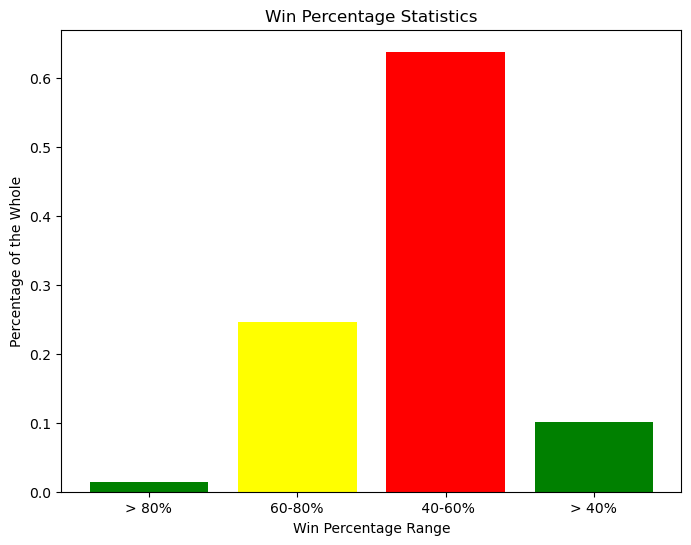

In [223]:
#Plotting win percentages using determined labels
percentOfDataset = [
    (df_1['win_percentages'] > 80).sum()/69,
    ((df_1['win_percentages'] >= 60) & (df_1['win_percentages'] <= 80)).sum()/69,
        ((df_1['win_percentages'] >= 40) & (df_1['win_percentages'] < 60)).sum()/69,
    (df_1['win_percentages'] < 40).sum()/69
]

labels = ['> 80%', '60-80%', ' 40-60%', '< 40%']


plt.figure(figsize=(8,6))
plt.bar(labels, percentOfDataset, color=['green', 'yellow', 'red'])
plt.title('Win Percentage Statistics')
plt.xlabel('Win Percentage Range')
plt.ylabel('Percentage of the Whole')
plt.show()